# Imports

In [1]:
%load_ext autoreload
from helper import *
%autoreload
%aimport helper

# Data

In [2]:
df = pd.read_csv('dataset_management\data\clean\clean.csv', parse_dates=['Timestamp'])

In [3]:
df.columns

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total'],
      dtype='object')

In [4]:
df.isna().sum().sum()

0

In [5]:
df_lag = pd.read_csv('dataset_management\data\clean\clean_lagged.csv', parse_dates=['Timestamp'])

In [6]:
df_lag.columns

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'],
      dtype='object')

In [7]:
df_lag.isna().sum().sum()

0

In [8]:
# setting up features and target
cols_std = ['DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'] 

features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']
target = 'Day_Ahead_price'

In [16]:
# setting up splits
# train_start = pd.to_datetime(['2018-01-01', '2021-01-01', '2021-07-01'], format = '%Y-%m-%d')
train_start = pd.to_datetime(['2018-01-01', '2019-01-01', '2020-01-01', '2022-01-01'], format = '%Y-%m-%d')
k_folds = len(train_start)

df_lag.columns

Index(['DK_1_imports', 'SE_4_imports', 'DK_1_exports', 'SE_4_exports',
       'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load', 'Solar_[MW]',
       'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total',
       'DAP-lag24', 'DAP-lag36', 'DAP-lag48', 'DAP-lag72', 'DAP-lag168',
       'DAP-lag-168'],
      dtype='object')

# Models

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [19]:
split_method = 0

### Baseline

train 2018-01-01 00:00:00 - 2018-11-06 23:00:00, test 2018-11-07 00:00:00 - 2018-12-31 23:00:00
Iteration  0


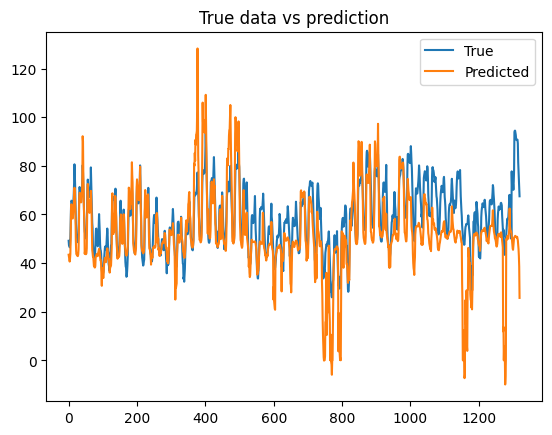

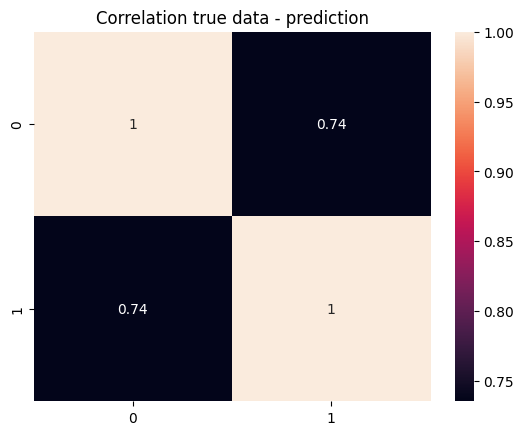

	r^2=-0.041864
Mean Absolute Error (MAE): 9.317804175258397
Mean Squared Error (MSE): 168.29440121879165
Root Mean Squared Error (RMSE): 12.972833199374438
Mean Absolute Percentage Error (MAPE): 16.24
Accuracy: 83.76
train 2019-01-01 00:00:00 - 2019-11-06 23:00:00, test 2019-11-07 00:00:00 - 2019-12-31 23:00:00
Iteration  1


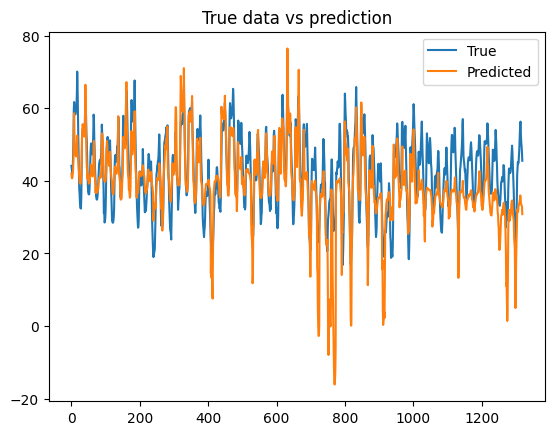

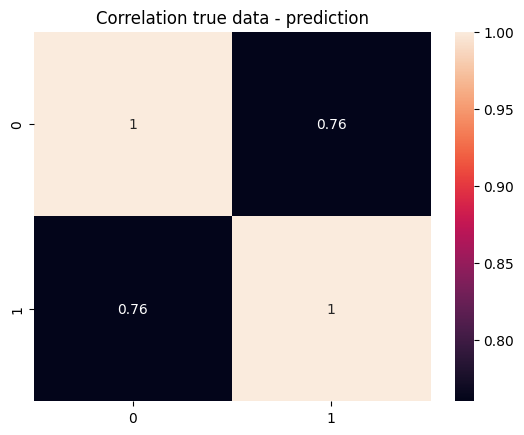

	r^2=0.331271
Mean Absolute Error (MAE): 6.270349685452437
Mean Squared Error (MSE): 69.93390943741694
Root Mean Squared Error (RMSE): 8.362649666069776
Mean Absolute Percentage Error (MAPE): 16.31
Accuracy: 83.69
train 2020-01-01 00:00:00 - 2021-09-12 23:00:00, test 2021-09-13 00:00:00 - 2021-12-31 23:00:00
Iteration  2


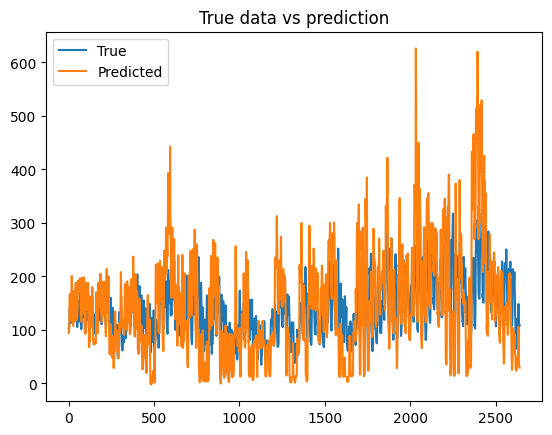

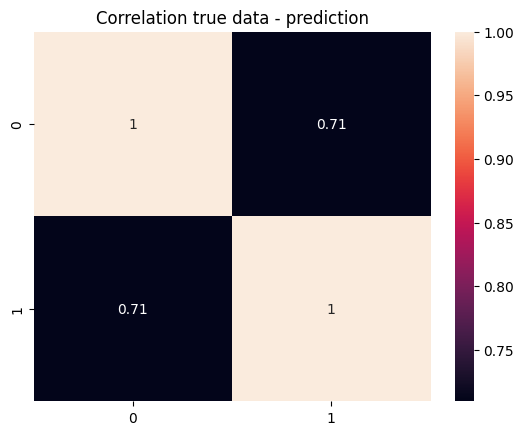

	r^2=-0.680794
Mean Absolute Error (MAE): 52.7687552128583
Mean Squared Error (MSE): 4766.714514959261
Root Mean Squared Error (RMSE): 69.04139711042399
Mean Absolute Percentage Error (MAPE): 40.89
Accuracy: 59.11
train 2022-01-01 00:00:00 - 2023-01-28 23:00:00, test 2023-01-29 00:00:00 - 2023-04-07 23:00:00
Iteration  3


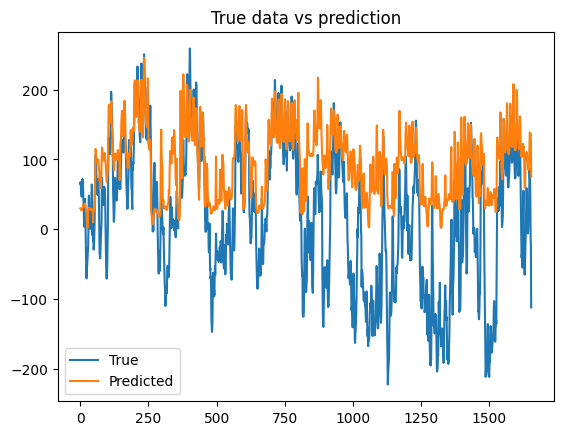

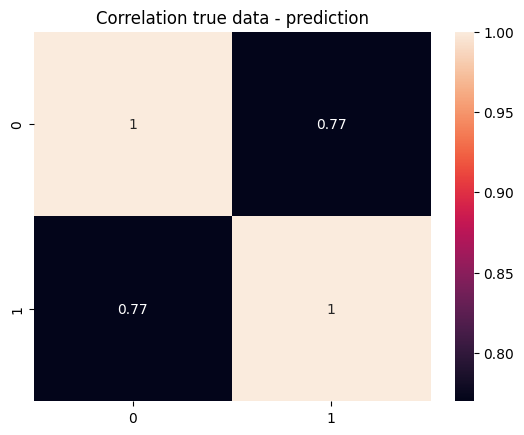

	r^2=-0.059550
Mean Absolute Error (MAE): 81.3843332728306
Mean Squared Error (MSE): 10528.524259415359
Root Mean Squared Error (RMSE): 102.60859739522492
Mean Absolute Percentage Error (MAPE): 499.07
Accuracy: -399.07


In [20]:
lr_pred_0, lr_model_0 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

In [14]:
lr_model_0

[{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False},
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False},
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}]

### Moving average

In [ ]:
df_ma_0 = run_model('ma', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std, pred_window = 24*1)

df_ma_0.dropna(how = 'any', axis = 0, inplace = True)
df_ma_0.drop(df_ma_0[df_ma_0[target] == 0].index, inplace = True)

In [ ]:
ytrue = np.array(df_ma_0[target]).ravel()
ypred = np.array(df_ma_0['pred']).ravel()

In [ ]:
model_evaluation(ytrue, ypred)

### Random Forest

In [ ]:
rf_pred_0, rf_models_0 = run_model('rf', df_lag, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

In [24]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lag, k_folds, split_method, train_start, features, target, cols_std,'short_term')

train 2018-01-01 00:00:00 - 2018-10-01 23:00:00, test 2018-10-02 00:00:00 - 2018-12-31 23:00:00


ValueError: feature_names must be string, and may not contain [, ] or <

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [21]:
split_method = 1

train 2018-01-01 00:00:00 - 2018-10-01 23:00:00, test 2018-10-02 00:00:00 - 2018-12-31 23:00:00
Iteration  0


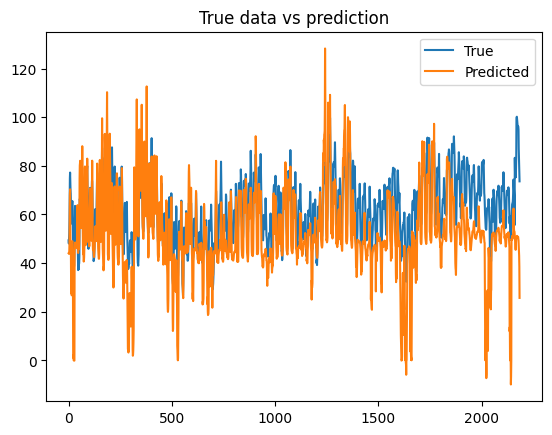

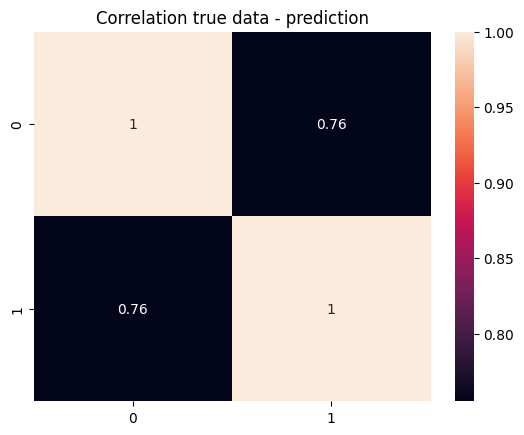

	r^2=-0.460223
Mean Absolute Error (MAE): 12.088914003741817
Mean Squared Error (MSE): 231.44966242709452
Root Mean Squared Error (RMSE): 15.21346976948699
Mean Absolute Percentage Error (MAPE): 20.35
Accuracy: 79.65
train 2018-01-01 00:00:00 - 2019-10-01 23:00:00, test 2019-10-02 00:00:00 - 2019-12-31 23:00:00
Iteration  1


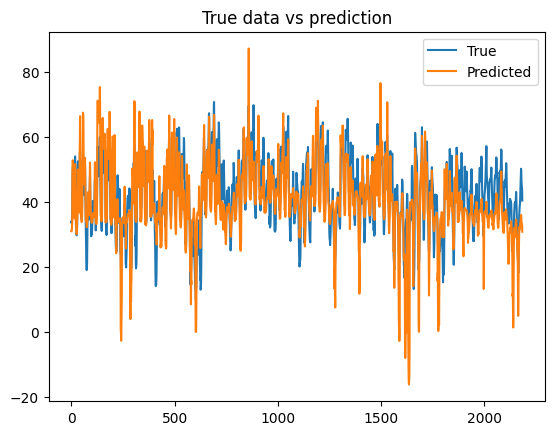

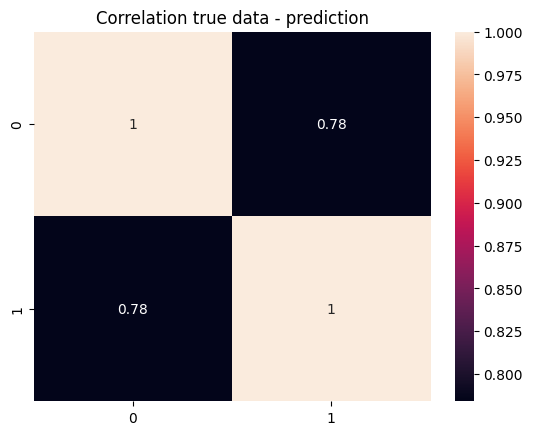

	r^2=0.471453
Mean Absolute Error (MAE): 5.840296387111438
Mean Squared Error (MSE): 59.43621612071584
Root Mean Squared Error (RMSE): 7.709488706828478
Mean Absolute Percentage Error (MAPE): 15.79
Accuracy: 84.21
train 2018-01-01 00:00:00 - 2021-10-01 23:00:00, test 2021-10-02 00:00:00 - 2021-12-31 23:00:00
Iteration  2


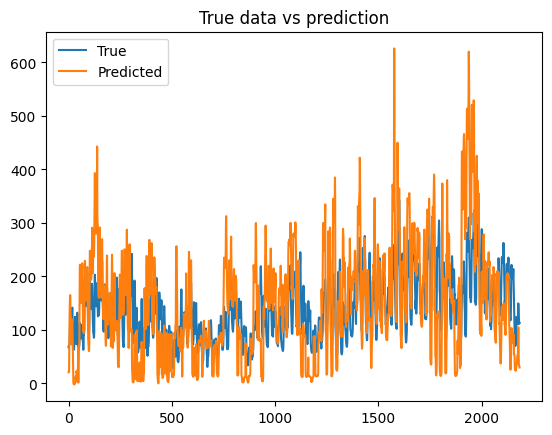

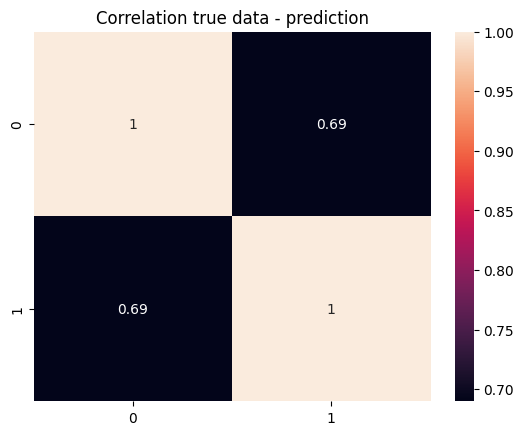

	r^2=-0.778332
Mean Absolute Error (MAE): 59.75883041949886
Mean Squared Error (MSE): 5791.481636353083
Root Mean Squared Error (RMSE): 76.10178471200976
Mean Absolute Percentage Error (MAPE): 47.64
Accuracy: 52.36
train 2018-01-01 00:00:00 - 2023-01-06 23:00:00, test 2023-01-07 00:00:00 - 2023-04-07 23:00:00
Iteration  3


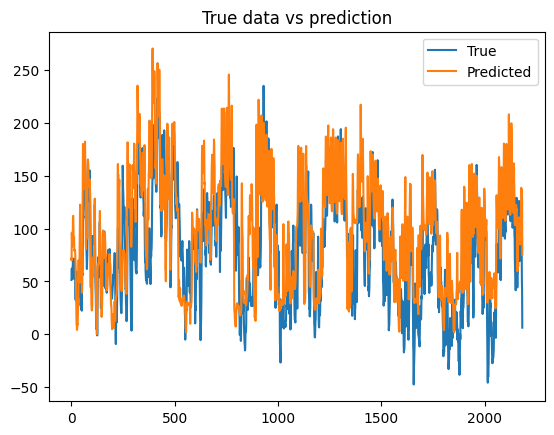

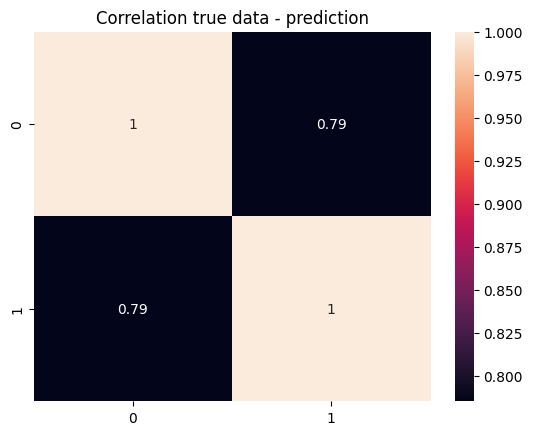

	r^2=0.450359
Mean Absolute Error (MAE): 30.29067479854359
Mean Squared Error (MSE): 1453.1858450339262
Root Mean Squared Error (RMSE): 38.12067477149278
Mean Absolute Percentage Error (MAPE): 143.9
Accuracy: -43.9


In [23]:
lr_pred_1, lr_model_1 = run_model('lr', df_lag, k_folds, split_method,
                                         train_start, features, target, cols_std)

In [ ]:
rf_pred_1, rf_models_1 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std, 'short_term')

In [ ]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

#### NOTES FRANCISCO/FREDERIK 14/04<br>
correlation between ytrue and ypred, RMSE can be hard to refrence.<br>
use power transform instead of log (how?)